 Probabilities given the review is :  pos
'Awful','Bad','Boring','Dull','Effective','Enjoyable', 'Great', 'Hilarious'
[0.019, 0.259, 0.048, 0.023, 0.123, 0.095, 0.411, 0.125]
Probabilities given the review is :  neg
'Awful','Bad','Boring','Dull','Effective','Enjoyable', 'Great', 'Hilarious'
[0.103, 0.514, 0.169, 0.092, 0.046, 0.053, 0.286, 0.051]
Positive and negative classification given the reviews were : Positive
753 247
Positive and negative classification given the reviews were : Negative
404 596
Classification Accuracy 67.45


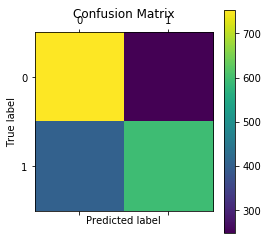

In [35]:
import sys
import glob
import errno
import re
import numpy as np
from collections import defaultdict
from decimal import *
getcontext().prec = 6
import matplotlib.pyplot as plt



# function to load files
def load_file(path,polarity):
    # define the feature vector 2D array
    w, h = 8, 1000;
    #making a global feature vector
    feature_vector = [[0 for x in range(w)] for y in range(h)]  
    # call the function to calculate feature_vector 
    # counter
    counter = 0
    # file contents
    file_contents = []
    # construct the path on the basis of polarity
    path = path+polarity+'/*.txt'
    # make the file object
    files = glob.glob(path) 
    files.sort()
    # for each file call the file and read its contents
    for name in files: # 'file' is a builtin type, 'name' is a less-ambiguous variable name.
        try:
            with open(name) as f: # f is the file object
                file_contents = f.read().lower()
                file_contents = re.split(r'[^\w]',file_contents)
                count_presence(file_contents,counter,feature_vector)
                counter = counter + 1
        except IOError as exc:
            if exc.errno != errno.EISDIR: 
                raise 
    return feature_vector
             
 # function to cound the presence 
#counting presence
def count_presence(file_contents,counter,feature_vector):
    # dictionary of words to consider
    dictionary = ['Awful','Bad','Boring','Dull','Effective','Enjoyable', 'Great', 'Hilarious']
    key = 0
    #loop and find words
    for value in dictionary:
        if value.lower() in file_contents:
            feature_vector[counter][key] = 1
        else:
            feature_vector[counter][key] = 0
        key = key + 1
    return feature_vector
        
# function to calculate and print probabilities   
def probability(start,end,total,feature_vector,polarity):
    del feature_vector[start:end]
    total = len(feature_vector)
    # summing the values
    prob = [0,0,0,0,0,0,0,0]
    for x in range (start,total):
        for y in range (0,8): 
            prob[y] = prob[y]+feature_vector[x][y]
    # divide the values by total
    for x in range (0,8):
        prob[x] = prob[x]/float(total)

    # printing the values for probability
    print "Probabilities given the review is : ", polarity
    print "'Awful','Bad','Boring','Dull','Effective','Enjoyable', 'Great', 'Hilarious'"
    print prob
    return prob,feature_vector

#calculating correct negative/positive out of total positive/negative
def calculations(start,end,label,total,vector,pos_p,neg_p):
    vector = vector[start:end]
    pos = 0
    neg = 0
    class_pos = [1]*total
    class_neg = [1]*total
    for x in range (0,total):
        for y in range (0,8):
            if (vector[x][y] == 1):
                class_pos[x] = (class_pos[x]*pos_p[y])
                class_neg[x] = (class_neg[x]*neg_p[y])
            else:
                class_pos[x] = (class_pos[x]*(1 - pos_p[y]))
                class_neg[x] = (class_neg[x]*(1 - neg_p[y]))
        if (class_pos[x] > class_neg[x]):
            pos = pos + 1
        else:
            neg = neg + 1
    print "Positive and negative classification given the reviews were :", label
    print pos,neg
    return pos,neg

# function to calculate and print classification accuracy
def class_acc(pos,neg1,total):
    total_correct = pos+neg1
    accuracy = total_correct/float(total)
    print "Classification Accuracy", accuracy*100
    return accuracy*100

# function for plotting the confusion matrix
def plot_conf_matrix(pos,neg,pos1,neg1):
    # construct matrix
    matrix = [[pos,neg],[pos1,neg1]]
    plt.matshow(matrix)
    # specify labels
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')
    # plot
    plt.colorbar() 

result0 = load_file(path='/Users/jagjitsingh/Desktop/Summer 2018/AI/Assignment 2/review_polarity/files/',polarity='pos')

result01 = load_file(path='/Users/jagjitsingh/Desktop/Summer 2018/AI/Assignment 2/review_polarity/files/',polarity='neg')

result = probability(start = 0,end = 0,total = 1000,feature_vector = result0,polarity='pos')    

result1 = probability(start = 0,end = 0,total = 1000,feature_vector = result01,polarity='neg')

result2 = calculations(start = 0,end = 1000, label='Positive',total=1000,vector=result0,pos_p = result[0],neg_p = result1[0])

result3 = calculations(start = 0,end = 1000, label='Negative',total=1000,vector=result01,pos_p = result[0],neg_p = result1[0])

class_acc(result2[0],result3[1],total=2000)
plot_conf_matrix(result2[0],result2[1],result3[0],result3[1])

    

Probabilities given the review is :  pos
'Awful','Bad','Boring','Dull','Effective','Enjoyable', 'Great', 'Hilarious'
[0.019, 0.259, 0.048, 0.023, 0.123, 0.095, 0.411, 0.125]
Probabilities given the review is :  neg
'Awful','Bad','Boring','Dull','Effective','Enjoyable', 'Great', 'Hilarious'
[0.103, 0.514, 0.169, 0.092, 0.046, 0.053, 0.286, 0.051]
Positive and negative classification given the reviews were : Positive
74 26
Positive and negative classification given the reviews were : Negative
39 61
Classification Accuracy 67.5
Probabilities given the review is :  pos
'Awful','Bad','Boring','Dull','Effective','Enjoyable', 'Great', 'Hilarious'
[0.019, 0.259, 0.048, 0.023, 0.123, 0.095, 0.411, 0.125]
Probabilities given the review is :  neg
'Awful','Bad','Boring','Dull','Effective','Enjoyable', 'Great', 'Hilarious'
[0.103, 0.514, 0.169, 0.092, 0.046, 0.053, 0.286, 0.051]
Positive and negative classification given the reviews were : Positive
76 24
Positive and negative classification given t

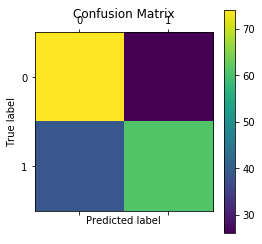

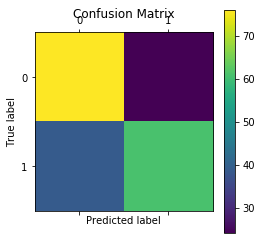

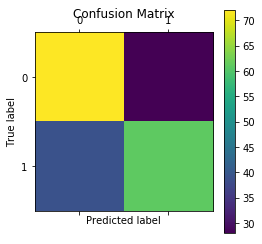

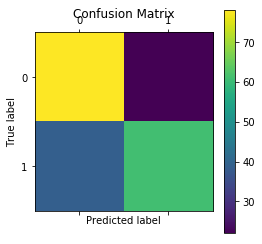

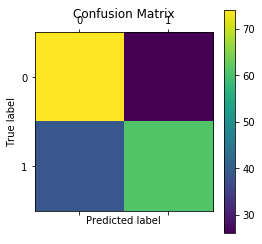

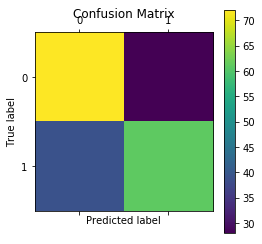

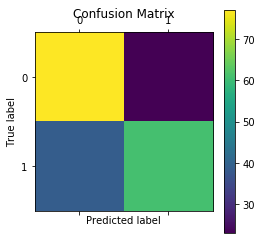

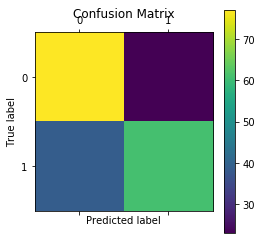

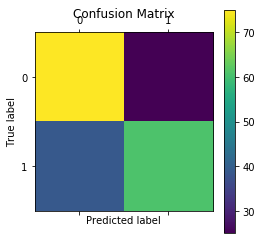

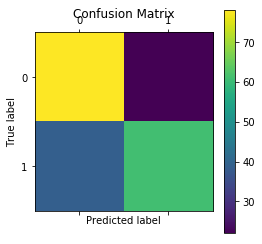

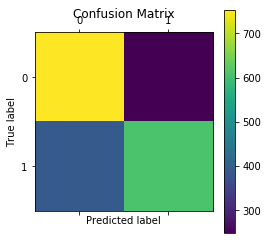

In [38]:
# K fold cross validation
# 0-100 test 100-1000 train
total_acc = 0
pos_pos = 0
pos_neg = 0
neg_pos = 0
neg_neg = 0
a = [0,100,200,300,400,500,600,700,800,900]
for x in a:
    result0 = load_file(path='/Users/jagjitsingh/Desktop/Summer 2018/AI/Assignment 2/review_polarity/files/',polarity='pos')

    result01 = load_file(path='/Users/jagjitsingh/Desktop/Summer 2018/AI/Assignment 2/review_polarity/files/',polarity='neg')
    
    result = probability(start = 0,end = 0,total = 1000,feature_vector = result0,polarity='pos')    

    result1 = probability(start = 0,end = 0,total = 1000,feature_vector = result01,polarity='neg')
    
    result2 = calculations(start = x,end = x+100, label='Positive',total=100,vector = result0,pos_p = result[0],neg_p = result1[0])
    pos_pos = pos_pos+result2[0]
    pos_neg = pos_neg+result2[1]
    result3 = calculations(start = 0,end = x+100, label='Negative',total=100,vector = result01,pos_p = result[0],neg_p = result1[0])
    neg_pos = neg_pos+result3[0]
    neg_neg = neg_neg+result3[1]
    result4 = class_acc(result2[0],result3[1],total=200)
    total_acc = total_acc+result4
    plot_conf_matrix(result2[0],result2[1],result3[0],result3[1])

print "Total accuracy : " , total_acc/float(10)
print "Positive and negative classification given the reviews were Positive:"
print pos_pos,pos_neg
print "Positive and negative classification given the reviews were Negative:"
print neg_pos,neg_neg



plot_conf_matrix(pos_pos,pos_neg,neg_pos,neg_neg)

In [44]:
import numpy as np
# Generating random reviews
Positive = {'Awful':0.019,'Bad':0.156,'Boring':0.048,'Dull':0.023,'Effective':0.123,'Enjoyable':0.095, 'Great':0.411, 'Hilarious':0.125}
Negative = {'Awful':0.103,'Bad':0.341,'Boring':0.128,'Dull':0.092,'Effective':0.046,'Enjoyable':0.053, 'Great':0.186, 'Hilarious':0.051}

print "*****************Positive Reviews******************" 
#generating positive reviews
review_words = list(Positive.keys())
word_probability = list(Positive.values())
#empty review
review = ''
for j in range(100):
    review+= ' ' + np.random.choice(review_words,p=word_probability)
print review
#empty review
review = ''
for j in range(100):
    review+= ' ' + np.random.choice(review_words,p=word_probability)
print review
#empty review
review = ''
for j in range(100):
    review+= ' ' + np.random.choice(review_words,p=word_probability)
print review

print "*****************Negative Reviews******************" 
#generating positive reviews
review_words = list(Negative.keys())
word_probability = list(Negative.values())
#empty review
review = ''
for j in range(100):
    review+= ' ' + np.random.choice(review_words,p=word_probability)
print review
#empty review
review = ''
for j in range(100):
    review+= ' ' + np.random.choice(review_words,p=word_probability)
print review
#empty review
review = ''
for j in range(100):
    review+= ' ' + np.random.choice(review_words,p=word_probability)
print review

*****************Positive Reviews******************
 Effective Boring Boring Great Great Bad Great Great Great Hilarious Great Great Hilarious Bad Hilarious Great Bad Effective Bad Hilarious Great Bad Great Great Bad Great Enjoyable Enjoyable Hilarious Hilarious Great Great Hilarious Bad Awful Bad Great Bad Hilarious Awful Effective Enjoyable Great Enjoyable Hilarious Great Enjoyable Great Enjoyable Great Awful Great Boring Great Effective Bad Effective Great Enjoyable Dull Dull Great Hilarious Boring Boring Great Effective Hilarious Bad Great Great Effective Enjoyable Hilarious Effective Enjoyable Great Great Great Great Great Effective Great Dull Bad Enjoyable Great Great Enjoyable Boring Enjoyable Great Effective Effective Bad Great Bad Boring Awful Great
 Great Enjoyable Boring Great Great Great Hilarious Great Great Great Bad Hilarious Great Great Effective Great Bad Great Bad Enjoyable Great Hilarious Enjoyable Great Great Awful Great Boring Great Awful Bad Bad Boring Boring Grea